In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
# -------------------------------
# Load Preprocessed Data
# -------------------------------
data_dir = os.path.join(os.getcwd(), "..", "data", "preprocessed")
df = pd.read_csv(os.path.join(data_dir, "preprocessed_data.csv"))
print("Loaded preprocessed data with shape:", df.shape)
print(df.head(), "\n")

Loaded preprocessed data with shape: (9621, 22)
   Date  Month_Num AI_Platform  Active_Users  Churned_Users  Daily_Churn_Rate  \
0  2024          9     ChatGPT        500000          25000              0.05   
1  2024          9     ChatGPT        500000          25000              0.05   
2  2024          9     ChatGPT        500000          25000              0.05   
3  2024          9     ChatGPT        500000          25000              0.05   
4  2024          5    DeepSeek       1700000          34000              0.02   

  Query_Type  Input_Text_Length  Response_Tokens        Topic_Category  ...  \
0    General                  7              280  Professional Writing  ...   
1    General                  7               80      Content Creation  ...   
2    General                  8              131        Best Practices  ...   
3    General                  7              426      Content Creation  ...   
4  Technical                  6              215             Debugging

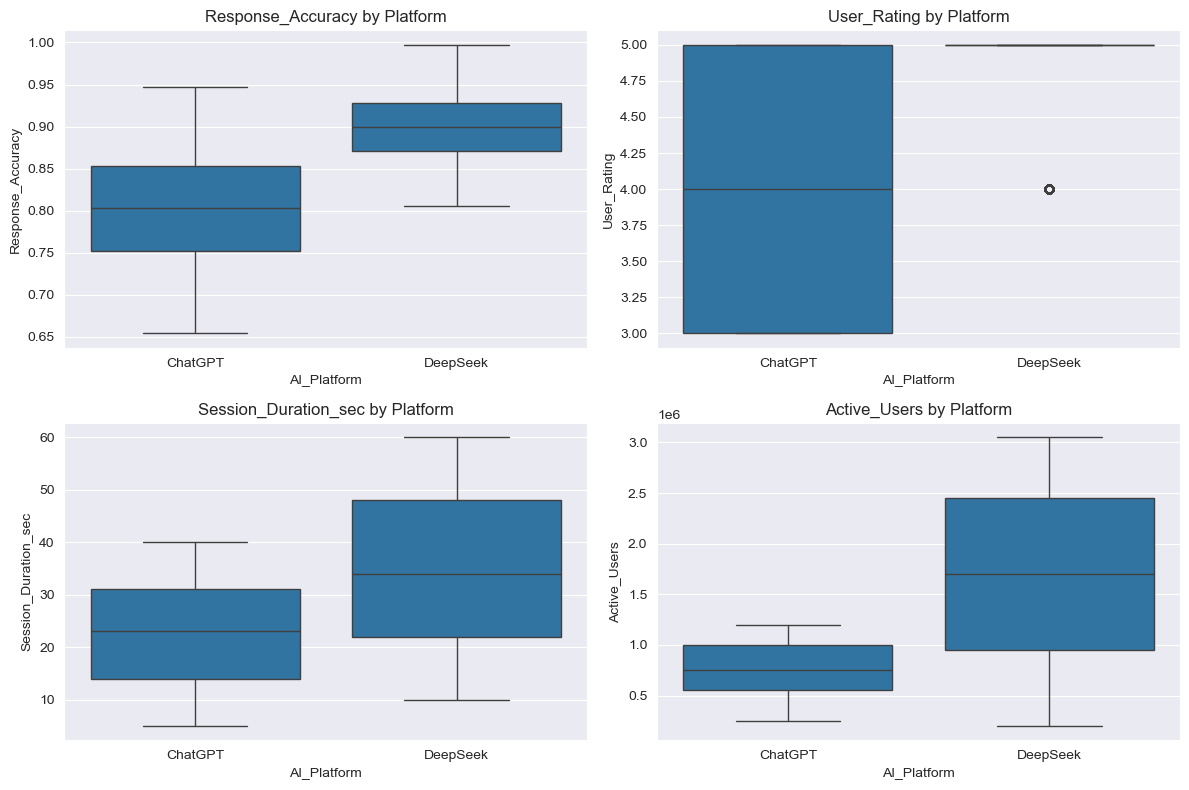

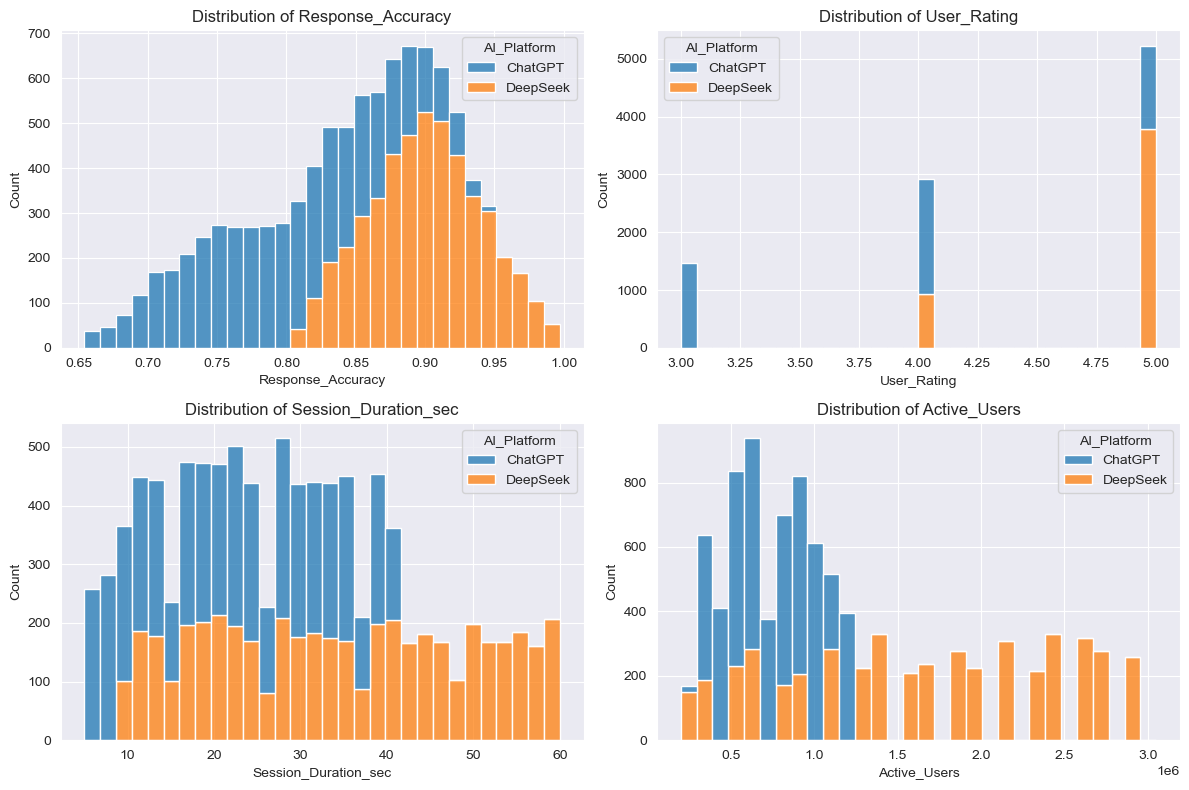

In [12]:
# -------------------------------
# 1. Visualize Numerical Metrics Distributions
# -------------------------------
numeric_cols = ['Response_Accuracy', 'User_Rating', 'Session_Duration_sec', 'Active_Users']

# Box plots for numerical metrics by AI_Platform
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='AI_Platform', y=col, data=df)
    plt.title(f'{col} by Platform')
    plt.tight_layout()
plt.show()

# Histograms for numerical metrics
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='AI_Platform', multiple='stack', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

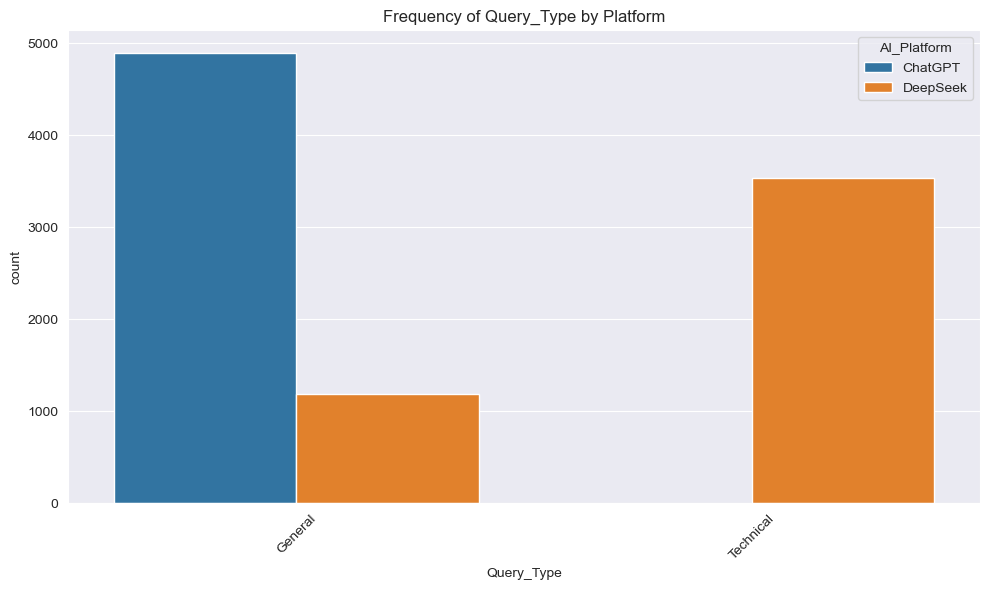

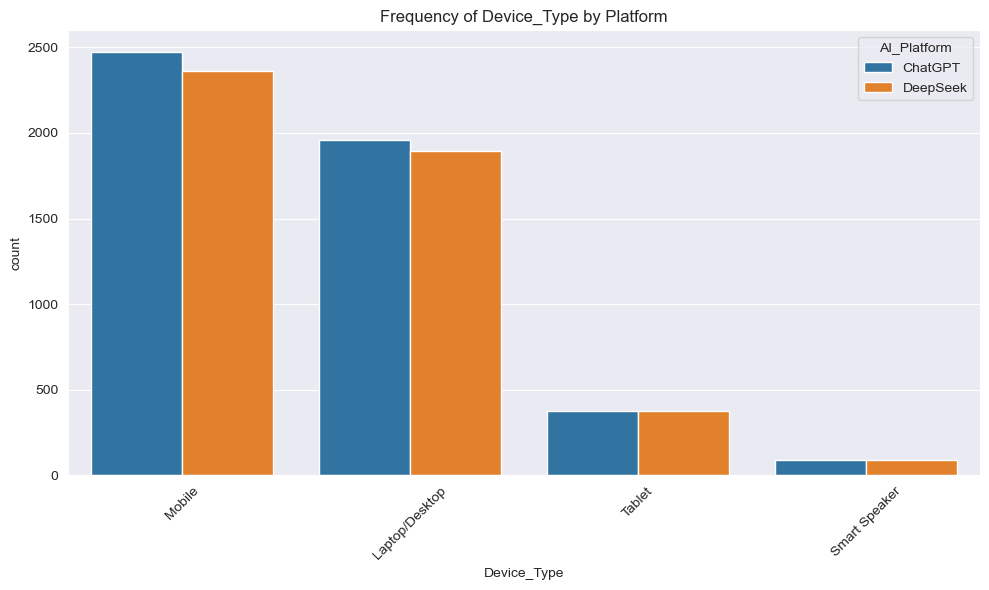

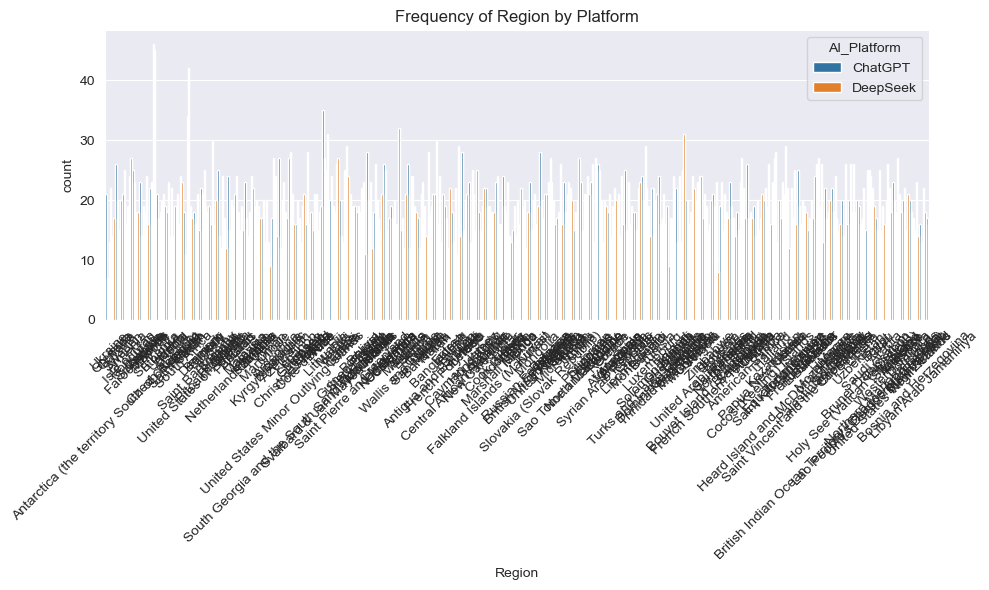

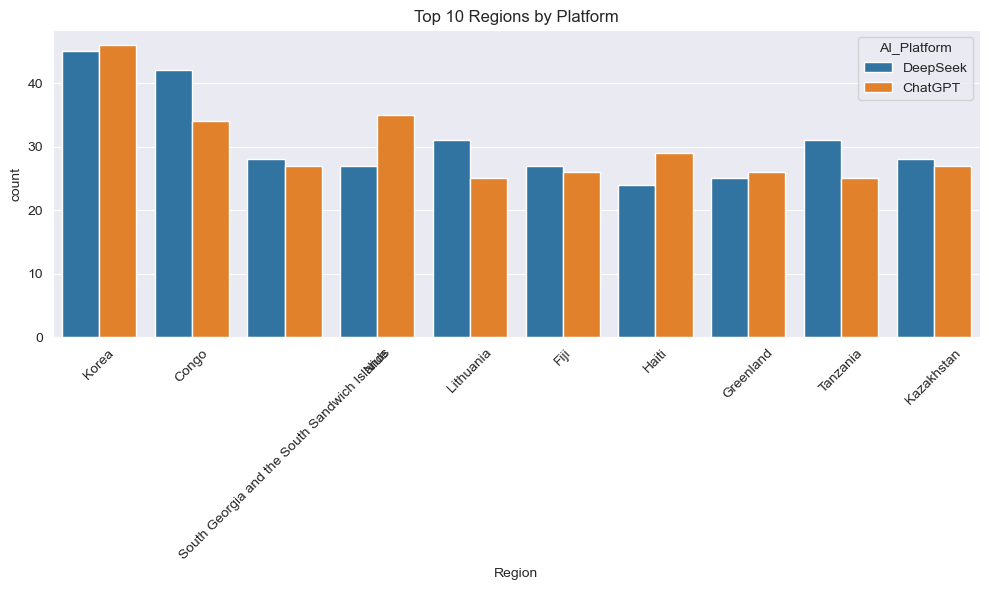

In [13]:
# -------------------------------
# 2. Analyze Categorical Variables
# -------------------------------
# Bar plots for categorical variables
categorical_cols = ['Query_Type', 'Device_Type', 'Region']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='AI_Platform')
    plt.title(f'Frequency of {col} by Platform')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Limit regions for better visualization (top 10)
top_regions = df['Region'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Region'].isin(top_regions)], x='Region', hue='AI_Platform')
plt.title('Top 10 Regions by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

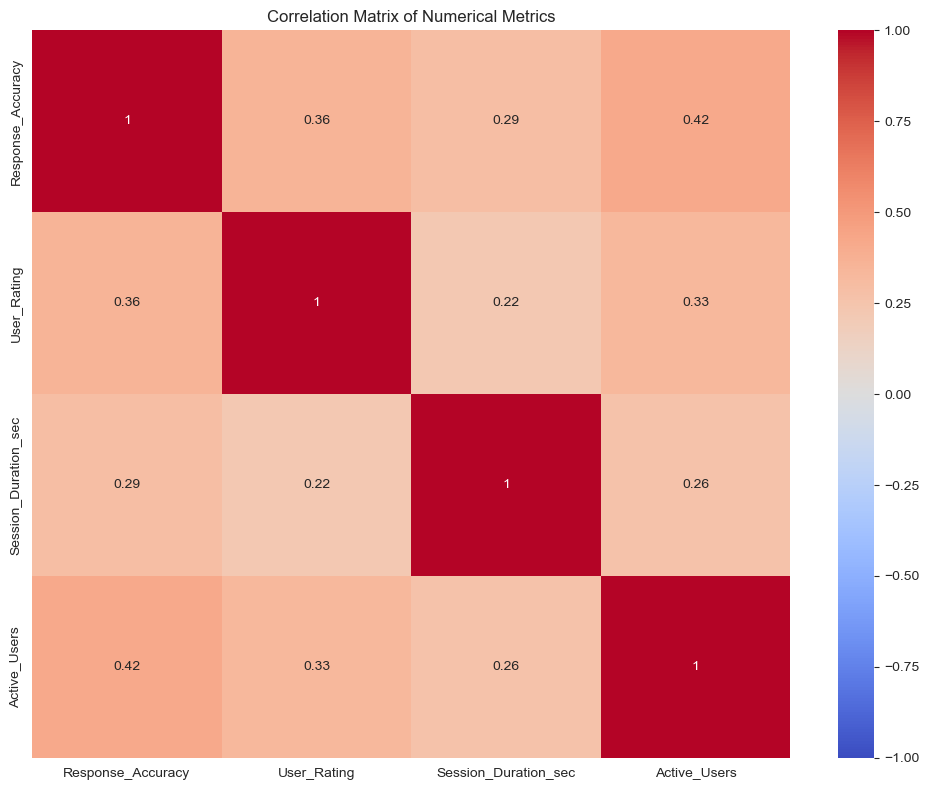

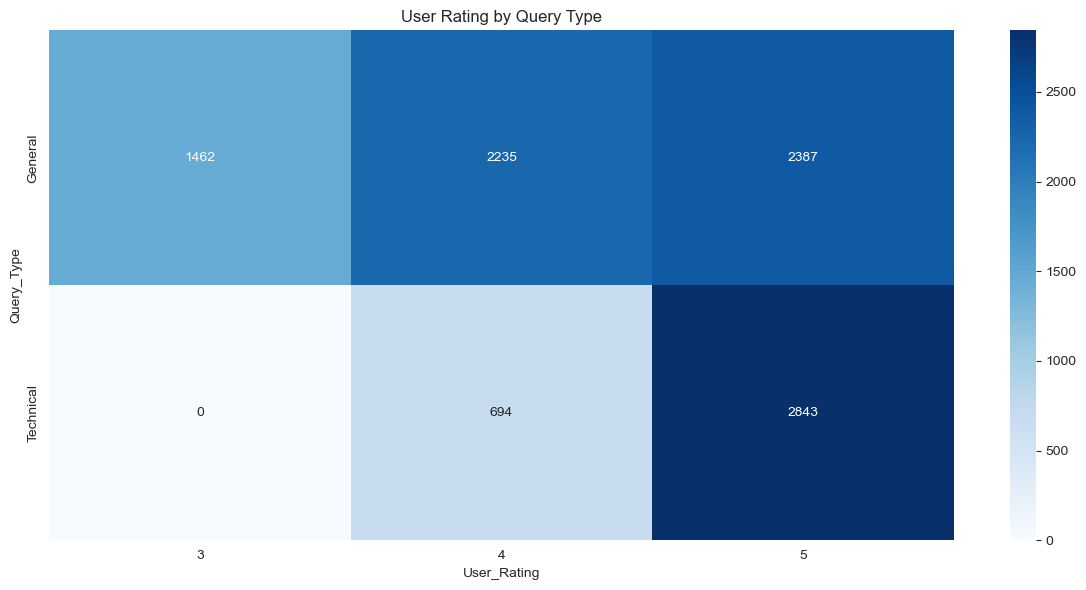

In [14]:
# -------------------------------
# 3. Explore Relationships
# -------------------------------
# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Metrics')
plt.tight_layout()
plt.show()

# Cross-tabulation: User_Rating by Query_Type
cross_tab = pd.crosstab(df['Query_Type'], df['User_Rating'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('User Rating by Query Type')
plt.tight_layout()
plt.show()

In [15]:
# -------------------------------
# 4. Summary Statistics
# -------------------------------
# Summary stats by AI_Platform
summary_stats = df.groupby('AI_Platform')[numeric_cols].describe()
print("Summary Statistics by AI_Platform:")
print(summary_stats)

Summary Statistics by AI_Platform:
            Response_Accuracy                                                \
                        count      mean       std     min       25%     50%   
AI_Platform                                                                   
ChatGPT                4894.0  0.802574  0.064646  0.6542  0.752525  0.8038   
DeepSeek               4727.0  0.899684  0.040618  0.8055  0.871100  0.8997   

                            User_Rating            ... Session_Duration_sec  \
                75%     max       count      mean  ...                  75%   
AI_Platform                                        ...                        
ChatGPT      0.8531  0.9467      4894.0  3.994892  ...                 31.0   
DeepSeek     0.9280  0.9972      4727.0  4.802412  ...                 48.0   

                  Active_Users                                         \
              max        count          mean            std       min   
AI_Platform                